In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier,AdaBoostClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, log_loss

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
sample = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")

In [3]:
train = train_df.copy()
test = test_df.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [8]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [9]:
train_id = train[["id"]]
test_id = test[["id"]]

In [10]:
train = train.set_index("id")
test =  test.set_index("id")

In [11]:
test = pd.DataFrame(test.drop(columns=["CustomerId","Surname"]))

In [12]:
for i in train.columns:
    if train[i].dtype == 'object':
        print(f"{i}:{train[i].nunique()}")
        print(train[i].value_counts())
        print("---------------------------------------")

Surname:2797
Surname
Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: count, Length: 2797, dtype: int64
---------------------------------------
Geography:3
Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
---------------------------------------
Gender:2
Gender
Male      93150
Female    71884
Name: count, dtype: int64
---------------------------------------


In [13]:
cat_column = []
for i in train.columns:
    if train[i].nunique() <= 14:
        print(f"{i}:{train[i].nunique()}")
        print(train[i].value_counts())
        print("---------------------------------------")
        cat_column.append(train[i].name)

Geography:3
Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
---------------------------------------
Gender:2
Gender
Male      93150
Female    71884
Name: count, dtype: int64
---------------------------------------
Tenure:11
Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64
---------------------------------------
NumOfProducts:4
NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64
---------------------------------------
HasCrCard:2
HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64
---------------------------------------
IsActiveMember:2
IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64
---------------------------------------
Exited:2
Exited
0    130113
1     34921
Name: count, dtype: int64
---------------------------------------


In [14]:
cat_column

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [15]:
columns_to_encode = cat_column[:2]

In [16]:
columns_to_encode

['Geography', 'Gender']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


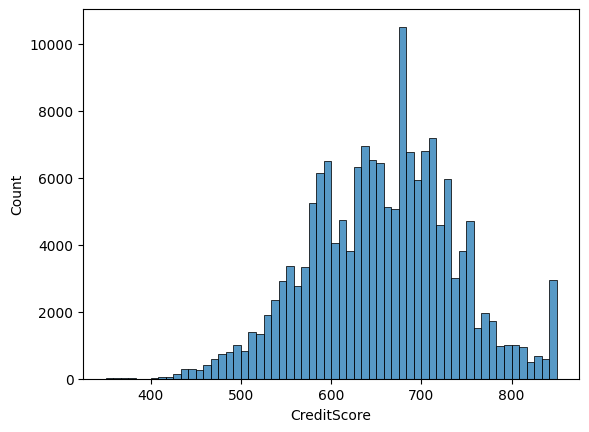

In [17]:
sns.histplot(train["CreditScore"], bins= 60)
plt.show()

In [18]:
train["CreditScore"].skew()

-0.059291219678312086

In [19]:
test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
165034,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...
275052,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
275053,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
275054,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38


In [20]:
std_column = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

In [21]:
out_column = ["Balance", "EstimatedSalary"]

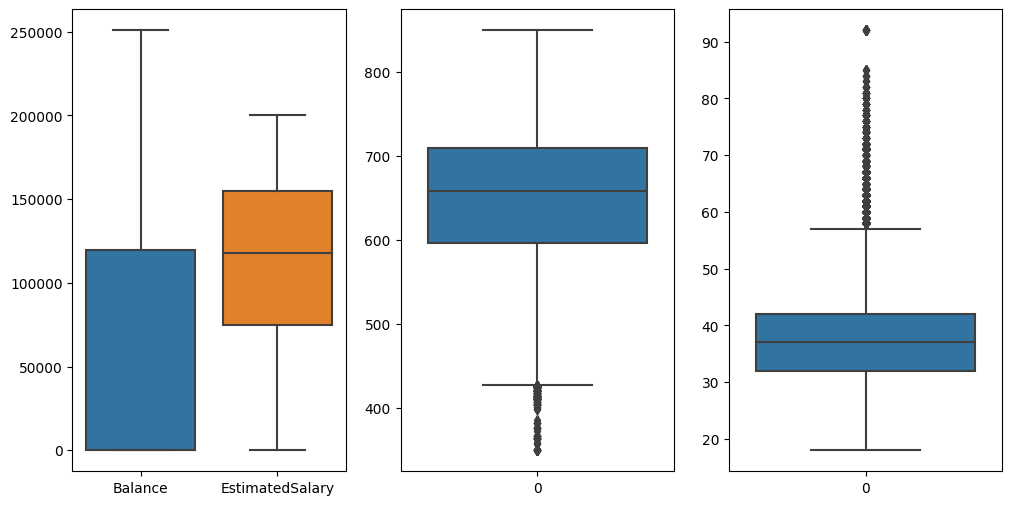

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
sns.boxplot(train[out_column])

plt.subplot(1, 3, 2)
sns.boxplot(train["CreditScore"])

plt.subplot(1, 3, 3)
sns.boxplot(train["Age"])

plt.show()

In [23]:
# len(train)

In [24]:
# def remove_outliers(df, columns):
#     for column in columns:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df

In [25]:
# train = remove_outliers(train,["CreditScore","Age"])

In [26]:
# len(train)

In [27]:
X = pd.DataFrame(train.drop(columns=["CustomerId", "Surname", "Exited"]))
y = pd.DataFrame(train["Exited"])

In [28]:
scaler = StandardScaler()
X[std_column] = scaler.fit_transform(X[std_column])

In [29]:
test[std_column] = scaler.transform(test[std_column])

In [30]:
type(columns_to_encode)

list

In [31]:
encoder = LabelEncoder()

for i in columns_to_encode:
    X[i] = encoder.fit_transform(X[i])
    test[i] = encoder.transform(test[i])

In [32]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
0,0.144135,0,1,-0.578074,3,-0.883163,2,1.0,0.0,1.369486
1,-0.367706,0,1,-0.578074,1,-0.883163,2,1.0,1.0,-1.254085
2,0.268974,0,1,0.211354,10,-0.883163,2,1.0,0.0,1.437422
3,-0.941966,0,1,-0.465299,2,1.486918,1,1.0,1.0,-0.557018
4,0.743362,2,1,-0.578074,5,-0.883163,2,1.0,1.0,-1.938770
...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,2,0,-0.578074,2,-0.883163,1,1.0,1.0,0.382957
165030,1.692140,0,1,-0.352523,3,-0.883163,1,0.0,0.0,0.382951
165031,-1.141708,0,1,-0.803625,5,-0.883163,1,1.0,1.0,0.295366


In [33]:
test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
165034,-0.879546,0,0,-1.705829,2,-0.883163,2,0.0,1.0,0.962404
165035,0.331393,0,0,0.888007,2,-0.883163,1,1.0,0.0,-0.795852
165036,-0.005672,0,0,-0.465299,7,-0.883163,2,1.0,0.0,0.523083
165037,0.306425,0,1,-0.239748,8,-0.883163,1,1.0,0.0,0.026977
165038,1.192783,1,1,-0.014197,10,1.047249,1,1.0,0.0,0.533997
...,...,...,...,...,...,...,...,...,...,...
275052,-1.079289,2,1,-1.029176,7,0.965046,1,1.0,1.0,0.706122
275053,-1.016869,0,0,-0.239748,4,1.950961,1,1.0,1.0,-1.399669
275054,0.693427,0,1,-0.803625,2,-0.883163,2,1.0,0.0,-1.914541


### Valdating

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [40]:
lr_model = LogisticRegression(penalty="l2", C=1, max_iter=100)
lr_model.fit(X_train, y_train)
print(lr_model.score(X_train, y_train))
y_pred = lr_model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8259371189226447
0.8269760959796407
0.6735491071428571
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     26052
           1       0.67      0.35      0.46      6955

    accuracy                           0.83     33007
   macro avg       0.76      0.65      0.68     33007
weighted avg       0.81      0.83      0.80     33007



In [42]:
rdg_model = RidgeClassifier(alpha=1)
rdg_model.fit(X_train, y_train)
print(rdg_model.score(X_train, y_train))
y_pred = rdg_model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8186431563240852
0.8193110552307087
0.6954635108481262
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     26052
           1       0.70      0.25      0.37      6955

    accuracy                           0.82     33007
   macro avg       0.76      0.61      0.63     33007
weighted avg       0.80      0.82      0.78     33007



In [43]:
sgd_model = SGDClassifier(loss="log_loss", random_state=0)
sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)
print(sgd_model.score(X_train, y_train))

print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8248312845099866
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     26052
           1       0.67      0.35      0.46      6955

    accuracy                           0.83     33007
   macro avg       0.76      0.65      0.68     33007
weighted avg       0.81      0.83      0.80     33007



In [44]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)

y_pred = xg_model.predict(X_test)
print(xg_model.score(X_train, y_train))
print(classification_report(y_test, y_pred))

0.880153301976111
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.81      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



In [45]:
cbc_model = CatBoostClassifier()
cbc_model.fit(X_train, y_train)

y_pred = cbc_model.predict(X_test)
print(cbc_model.score(X_train, y_train))
print(classification_report(y_test, y_pred))

# 0.8776613874434774
#               precision    recall  f1-score   support

#            0       0.89      0.95      0.92     26052
#            1       0.75      0.56      0.64      6955

#     accuracy                           0.87     33007
#    macro avg       0.82      0.75      0.78     33007
# weighted avg       0.86      0.87      0.86     33007

Learning rate set to 0.082881
0:	learn: 0.6184947	total: 24ms	remaining: 23.9s
1:	learn: 0.5598340	total: 45.2ms	remaining: 22.6s
2:	learn: 0.5145798	total: 68.1ms	remaining: 22.6s
3:	learn: 0.4795605	total: 90.1ms	remaining: 22.4s
4:	learn: 0.4521280	total: 112ms	remaining: 22.3s
5:	learn: 0.4313551	total: 134ms	remaining: 22.2s
6:	learn: 0.4131382	total: 156ms	remaining: 22.1s
7:	learn: 0.3988703	total: 178ms	remaining: 22.1s
8:	learn: 0.3880333	total: 202ms	remaining: 22.2s
9:	learn: 0.3791274	total: 223ms	remaining: 22.1s
10:	learn: 0.3709354	total: 244ms	remaining: 21.9s
11:	learn: 0.3637485	total: 265ms	remaining: 21.9s
12:	learn: 0.3582401	total: 285ms	remaining: 21.6s
13:	learn: 0.3535396	total: 305ms	remaining: 21.5s
14:	learn: 0.3497342	total: 324ms	remaining: 21.3s
15:	learn: 0.3466132	total: 343ms	remaining: 21.1s
16:	learn: 0.3435355	total: 366ms	remaining: 21.2s
17:	learn: 0.3412630	total: 386ms	remaining: 21s
18:	learn: 0.3396630	total: 407ms	remaining: 21s
19:	learn: 0.

In [46]:
LG_model = LGBMClassifier()
LG_model.fit(X_train, y_train)

y_pred = LG_model.predict(X_test)
print(LG_model.score(X_train, y_train))
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
0.8692237193907307
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007



### OG test

In [47]:
xg_model = XGBClassifier()
xg_model.fit(X, y)

y_pred = xg_model.predict(test)
print(xg_model.score(X, y))

0.8785341202418896


In [48]:
output = test_id

In [49]:
y.columns

Index(['Exited'], dtype='object')

In [50]:
output["Exited"] = pd.DataFrame(y_pred)

/tmp/ipykernel_33/3465080392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output["Exited"] = pd.DataFrame(y_pred)


In [51]:
output = output.set_index("id")

In [52]:
output

,Exited
id,
165034,0
165035,1
165036,0
165037,0
165038,0
...,...
275052,0
275053,0
275054,0


In [53]:
output.to_csv("BC_Banck_Churn_XGB_NC.csv")